In [1]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import pickle
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
#Load the dataset
#importing the dataset by passing the path
data = pd.read_csv('C:/Users/Nyabuto/Desktop/user_reviews.csv')
data.head()
print(data)

                               App  \
0            10 Best Foods for You   
1            10 Best Foods for You   
2            10 Best Foods for You   
3            10 Best Foods for You   
4            10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
...                                                  ...       ...   
64290                                                

In [3]:
#Analyze the data
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [4]:
#Data preprocessing
#Cleaning the dataset by removing null values from the reviews.
data.isnull().sum()
data['App'].nunique()
data.dropna(inplace=True)
data.dropna(inplace=True)
data.isnull().sum()
data.describe()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [5]:
#feature selection
#Convert the sentiment values from string to numerical format.
df=pd.concat([data['Translated_Review'],data['Sentiment']],axis=1)
df['Sentiment'].value_counts()
df['Sentiment']=[0 if i=='Positive' else 1 if i=='Negative' else 2 for i in df['Sentiment']]
df.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,0
1,This help eating healthy exercise regular basis,0
3,Works great especially going grocery store,0
4,Best idea us,0
5,Best way,0
6,Amazing,0
8,"Looking forward app,",2
9,It helpful site ! It help foods get !,2
10,good you.,0
11,Useful information The amount spelling errors ...,0


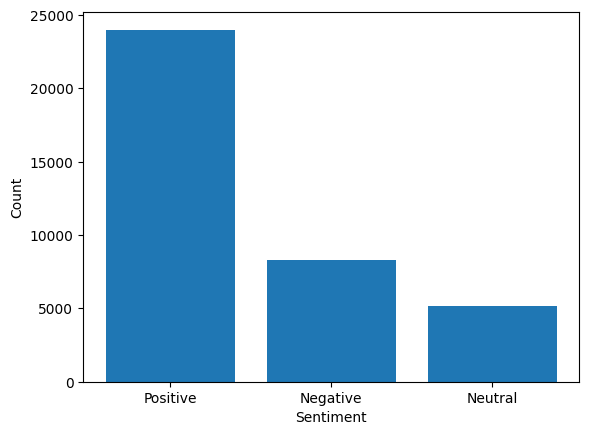

In [6]:
# plotting  a bar graph as avisual representation of the distribution of the processed dataset
# Count the number of occurrences of each sentiment in the column
sentiment_count = df['Sentiment'].value_counts()
plt.bar(sentiment_count.index, sentiment_count.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Positive', 'Negative', 'Neutral'])
plt.show()

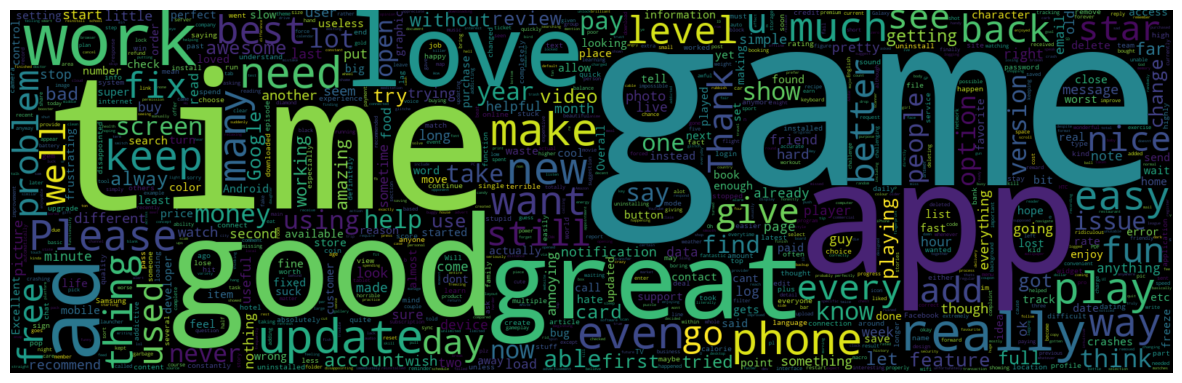

In [7]:
#Generate a word cloud to visualize the most common words in the reviews.
df['Translated_Review'][1]
words = df['Translated_Review']
plt.figure(figsize = (15,15))
word_cloud  = WordCloud(max_words = 1000 , width = 1600 , height = 500,
               collocations=False).generate(" ".join(words))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
#Dividing the dataset into training and testing
#defining X and y
y = df['Sentiment'].values
X = df['Translated_Review']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=30, shuffle=True)
print(f'y_train: {len(y_train)} X_train: {len(X_train)}')
print(f'y_test: {len(y_test)} X_test: {len(X_test)}')
print(f'Data Spliting Completed.')


y_train: 26198 X_train: 26198
y_test: 11229 X_test: 11229
Data Spliting Completed.


In [9]:
# Define multinomial logistic regression function
def multilogreg(X, y, alpha=0.01, num_iterations=100):
    # Initialize weights and biases
    num_features = X.shape[1]
    num_classes = len(np.unique(y))
    W = np.zeros((num_features, num_classes))
    b = np.zeros((1, num_classes))
    # Loop over iterations
    for i in range(num_iterations):
        # Forward pass
        z = np.dot(X.toarray(), W) + b
        y_pred = softmax(z)
        # Compute loss
        m = len(y)
        y_pred_labels = np.argmax(y_pred, axis=1)  # convert one-hot encoded array to labels
        y_one_hot = y.values  # convert labels to one-hot encoded array
        cost = (-1 / m) * np.sum(y_one_hot * np.log(y_pred))
        # Backward pass
        dz = y_pred - y_one_hot
        dW = (1 / m) * np.dot(X.toarray().T, dz)
        db = (1 / m) * np.sum(dz, axis=0, keepdims=True)
        # Update weights and biases
        W = W - alpha * dW
        b = b - alpha * db
       
    return W, b


#Modelling the data
#Training a logistic regression model on the training data
# using vectorizer to convert the reviews into numerical features
model = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(max_iter=1000))])

#fitting the model
model.fit(X_train, y_train)
print(f'Fitting Model Completed.')
#saving the fitted model
filename = 'model.pickle'
pickle.dump(model, open(filename, 'wb'))
print(f'model saving completed')


Fitting Model Completed.
model saving completed


In [10]:
#model evaluation
#defining and displaying the testing and training accuracies for five iterations

train_acc = []
test_acc = []
for epoch in range(5): 
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
    print("Epoch {}: Training Accuracy = {:.4f}, Testing Accuracy = {:.4f}".format(epoch+1, train_acc[-1], test_acc[-1]))
Score = model.score(X_test, y_test)
print(f'Accuracy: {Score}')


Epoch 1: Training Accuracy = 0.9545, Testing Accuracy = 0.9093
Epoch 2: Training Accuracy = 0.9545, Testing Accuracy = 0.9093
Epoch 3: Training Accuracy = 0.9545, Testing Accuracy = 0.9093
Epoch 4: Training Accuracy = 0.9545, Testing Accuracy = 0.9093
Epoch 5: Training Accuracy = 0.9545, Testing Accuracy = 0.9093
Accuracy: 0.9092528275002226


In [11]:
LR_pred = model.predict(X_test)
report = classification_report(y_test, LR_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7250
           1       0.91      0.80      0.85      2461
           2       0.88      0.79      0.84      1518

    accuracy                           0.91     11229
   macro avg       0.90      0.85      0.88     11229
weighted avg       0.91      0.91      0.91     11229



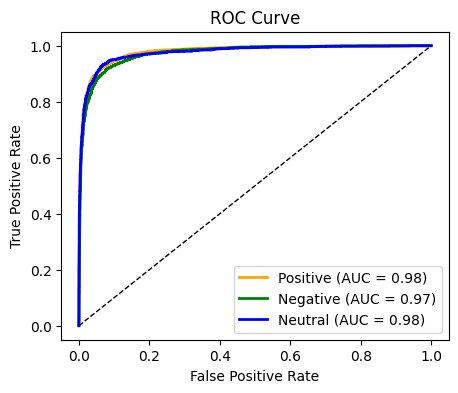

In [12]:
# Predicting probabilities for each class using the trained model
y_proba = model.predict_proba(X_test)
# Computing the ROC curve for each class

fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score((y_test == i).astype(int), y_proba[:, i])
    
plt.figure(figsize=(5, 4))
plt.plot(fpr[0], tpr[0], color='orange', lw=2, label='Positive (AUC = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green', lw=2, label='Negative (AUC = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue', lw=2, label='Neutral (AUC = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



In [13]:
#plotting confusion matrix 
confusion=metrics.confusion_matrix(y_test, LR_pred)
print(confusion)
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

print((TP+TN)/float(TP+TN+FN+FN))
print(metrics.accuracy_score(y_test,LR_pred))
precision=TP/float(TP+FP)
print(precision)

[[7043  137   70]
 [ 411 1961   89]
 [ 250   62 1206]]
0.9163443924282516
0.9092528275002226
0.9346997140133461


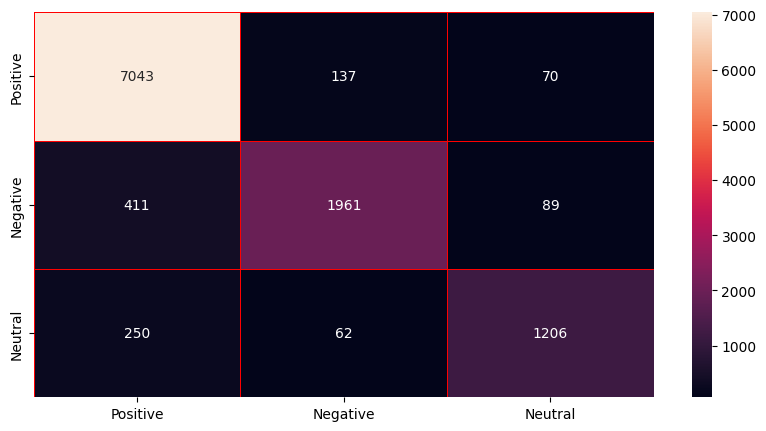

In [14]:
LR_pred = model.predict(X_test)
cm = confusion_matrix(y_test, LR_pred)
side_bar = ["Positive", "Negative", "Neutral"]
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm, annot=True, linewidth=.5, linecolor="r", fmt=".0f", ax=ax)
ax.set_xticklabels(side_bar)
ax.set_yticklabels(side_bar)
plt.show()

In [15]:
filename = 'model.pickle'
pickle.dump(model, open(filename, 'wb'))

with open('model.pickle', 'rb') as f:
    model = pickle.load(f)

def predict(texts, model):
    sentiment = model.predict(texts)

    match = []
    for text, pred in zip(texts, sentiment):
        match.append((text, pred))  # Saving the text and genetaed sentiments by the model

    df = pd.DataFrame(match, columns=['Translated_Reviews', 'Sentiments'])  # Creating a dataframe to store predictions
    df = df.replace([0, 1, 2], ['Positive', 'Negative', 'Neutral'])

    return df

In [16]:

    # USING THE SAVED MODEL FOR A REAL CASE


text = ["Looking forward app,"]

model.predict(text)

result = predict(text, model)
print(result)


     Translated_Reviews Sentiments
0  Looking forward app,    Neutral
